### Importing libraries

In [1]:
import os
import pandas as pd
import librosa
import numpy as np
import IPython.display as ipd
from glob import glob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Training dataset

In [18]:
labels = pd.read_csv("E:/Documents/04-Project/CSE1015/train.csv",names=['ID','Class'])

labels['Class'].unique()    


array(['Class', 'siren', 'street_music', 'drilling', 'dog_bark',
       'children_playing', 'gun_shot', 'engine_idling', 'air_conditioner',
       'jackhammer', 'car_horn'], dtype=object)

In [19]:
labels

,ID,Class
0,ID,Class
1,0,siren
2,1,street_music
3,2,drilling
4,3,siren
...,...,...
5431,8725,engine_idling
5432,8726,dog_bark
5433,8727,engine_idling
5434,8728,engine_idling


In [20]:
classes = labels[1:].Class.unique()
class_nums = pd.factorize(classes)
cdict = {k:v for (k,v) in zip(class_nums[1],class_nums[0])}
inverted_cdict = dict([[v,k] for k,v in cdict.items()])
train_files = glob('E:/Documents/04-Project/CSE1015/Train/*.wav')
cdict

{'siren': 0,
 'street_music': 1,
 'drilling': 2,
 'dog_bark': 3,
 'children_playing': 4,
 'gun_shot': 5,
 'engine_idling': 6,
 'air_conditioner': 7,
 'jackhammer': 8,
 'car_horn': 9}

Examining sigle sound file

In [19]:
file_name = 'E:/Documents/04-Project/CSE1015/Train/2.wav'

ipd.Audio(file_name)

Load sound file

In [20]:
data, sampling_rate = librosa.load(file_name)

print('shape is {} sampling rate is {}'.format(data.shape,sampling_rate))

print('data type is', data.dtype)

shape is (88200,) sampling rate is 22050
data type is float32


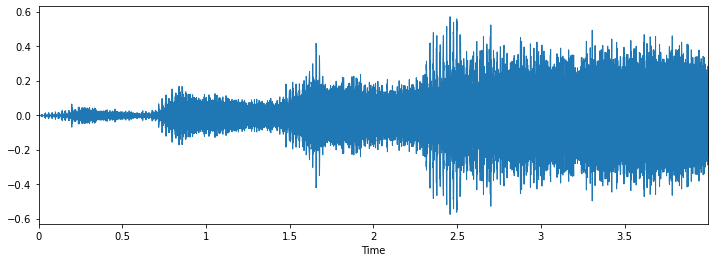

In [21]:
import librosa.display

plt.figure(figsize=(12, 4))

librosa.display.waveplot(data, sr=sampling_rate)

### Fucntion definitions

In [2]:
TARGET_LEN = 88200
HZ_SLICE = 14

def data_to_spec(data):
    D = librosa.stft(data)
    return librosa.power_to_db(np.abs(D)**2, ref=np.median)

def file_to_spec(filename):
    data,rate = librosa.load(filename)
    if data.shape[0] != TARGET_LEN:
        data = extend_short_sounds(data)
    return data_to_spec(data)

def file_to_label(filename):
    fname = os.path.basename(filename)
    cid = fname.replace('.wav','')
    classname = labels.loc[labels['ID']==cid]
    return classname.values.tolist()[0][1]

def show_file(filename):
    plt.title(file_to_label(filename))
    librosa.display.specshow(file_to_spec(filename), x_axis='time', y_axis='linear');
    plt.colorbar();
    
def extend_short_sounds(data):
    stretched = librosa.effects.time_stretch(data, rate=data.shape[0]/TARGET_LEN)
    return stretched[:TARGET_LEN:]

def drop_frequency_bands(data):
    return data[::HZ_SLICE,]

def show_progress(progress):
    if progress % 40:
        print('.',end="")
    else:
        print(".")

### Getting the STFTs

In [23]:
def wav_to_stft(files,labels):
    info = []
    data_arr = []
    progress = 0
    for filename in files:
        d = file_to_spec(filename)
        data_arr.append(d)
        if isinstance(labels,pd.DataFrame):
            info.append(file_to_label(filename))
        else:
            info.append(filename)
        progress+=1
        show_progress(progress)
    return data_arr, info

train_data, train_labels = wav_to_stft(train_files,labels)
np.save('train_spec_nodrop',train_data)
np.save('train_label_nodrop',train_labels)
print('done')

........................................
........................................
....................................

C:\Users\ashke\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(


....
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
................

C:\Users\ashke\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(


........................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
............................

C:\Users\ashke\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(


............
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
...

#### Spectrograms of various classes

-33.91557 46.08443


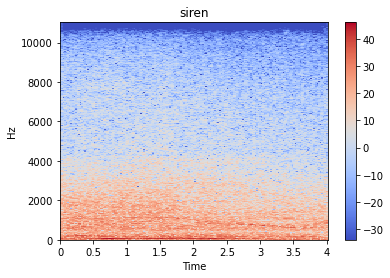

In [93]:
def files_to_spec(filename):
    data, rate = librosa.load(filename)
    return data_to_spec(data)

file = train_files[0]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

-37.45797 42.54203


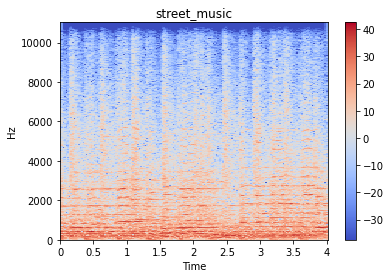

In [94]:
file = train_files[1]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

-24.799843 55.200157


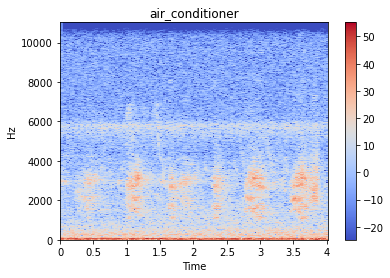

In [95]:
file = train_files[3]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

-32.16585 47.83415


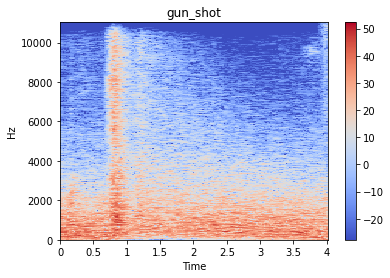

In [96]:
file = train_files[20]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

-38.291534 41.708466


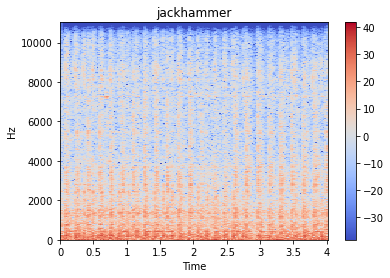

In [97]:
file = train_files[8]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

-3.1576614 76.84234


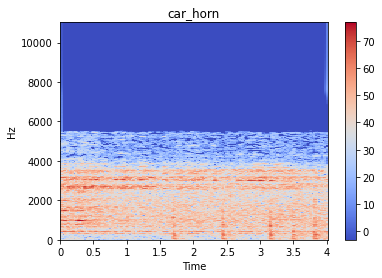

In [98]:
file = train_files[9]
sp = files_to_spec(file)
print(np.amin(sp), np.amax(sp))
show_file(file)

In [35]:
train_spec_load = np.load('train_spec_nodrop.npy')
train_labels_load = np.load('train_label_nodrop.npy')
train_spec_load.shape

(5435, 1025, 173)

### Data Split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
labels = np.array(list(map(lambda k: cdict[k], train_labels_load)))

train_data, test_data1, train_labels, test_labels1 = train_test_split(
    train_spec_load,
    labels,
    test_size  = 0.30,
    random_state = 42
)

validation_data, test_data, validation_labels, test_labels = train_test_split(
    test_data1,
    test_labels1,
    test_size=0.30,
    random_state=42
)

print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

NameError: name 'train_labels_load' is not defined

In [35]:
train_data= train_data.reshape((train_data.shape[0], 1025, 173, 1))
train_data= train_data.astype('float32')/255
test_data= test_data.reshape((test_data.shape[0], 1025, 173, 1))
test_data= test_data.astype('float32')/255
validation_data= validation_data.reshape((validation_data.shape[0], 1025, 173, 1))
validation_data= validation_data.astype('float32')/255

train_data.shape

(3804, 1025, 173, 1)

### The CNN Model

In [36]:
model= Sequential()
model.add(
    layers.Conv2D(
        32,
        (2,2),
        activation='relu',
        input_shape=(1025,173,1)
    )
)
model.add(layers.MaxPooling2D((2,2)))
model.add(
    layers.Conv2D(
        64,
        (2,2),
        activation='relu',
        input_shape=train_data.shape
    )
)
model.add(layers.MaxPooling2D((2,2)))
model.add(
    layers.Conv2D(
        128,
        (2,2),
        activation='relu',
        input_shape=train_data.shape
    )
)
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1024, 172, 32)     160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 512, 86, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 511, 85, 64)       8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 42, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 254, 41, 128)      32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 20, 128)      0         
_________________________________________________________________
flatten (Flatten)            (None, 325120)            0

In [40]:
model.compile(loss= 'sparse_categorical_crossentropy', 
             optimizer='rmsprop',
             metrics=['accuracy']
             )

In [41]:
example_batch= train_data[:5]
example_result= model.predict(example_batch)
example_result[0]

array([0.09981206, 0.10038055, 0.10022758, 0.09979588, 0.09981758,
       0.10064896, 0.10020648, 0.10045869, 0.09936056, 0.09929158],
      dtype=float32)

In [42]:
history= model.fit(train_data, train_labels, epochs=16, verbose= 1, 
                   validation_data=(validation_data, validation_labels))

Epoch 1/16
119/119 [==============================] - 618s 5s/step - loss: 2.7581 - accuracy: 0.2755 - val_loss: 1.4635 - val_accuracy: 0.5048
Epoch 2/16
119/119 [==============================] - 567s 5s/step - loss: 1.2932 - accuracy: 0.5417 - val_loss: 1.0150 - val_accuracy: 0.6924
Epoch 3/16
119/119 [==============================] - 566s 5s/step - loss: 0.8651 - accuracy: 0.7227 - val_loss: 0.6829 - val_accuracy: 0.7949
Epoch 4/16
119/119 [==============================] - 597s 5s/step - loss: 0.4888 - accuracy: 0.8477 - val_loss: 0.5799 - val_accuracy: 0.8256
Epoch 5/16
119/119 [==============================] - 533s 4s/step - loss: 0.2835 - accuracy: 0.9230 - val_loss: 0.4675 - val_accuracy: 0.8545
Epoch 6/16
119/119 [==============================] - 517s 4s/step - loss: 0.1263 - accuracy: 0.9651 - val_loss: 0.5411 - val_accuracy: 0.8484
Epoch 7/16
119/119 [==============================] - 513s 4s/step - loss: 0.0753 - accuracy: 0.9807 - val_loss: 0.5761 - val_accuracy: 0.8536

### Model Evalutation

In [43]:
test_loss, test_acc= model.evaluate(test_data, test_labels)
test_acc

16/16 [==============================] - 17s 1s/step - loss: 0.8843 - accuracy: 0.8531


0.8530611991882324

In [44]:
history
model.save_weights('urbansound_model')

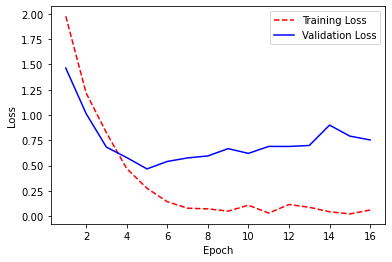

In [46]:
training_loss= history.history['loss']
validation_loss= history.history['val_loss']

epoch_count= range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [56]:
test_files= glob('E:/Documents/04-Project/CSE1015/Test/*.wav')

In [57]:
def shape_make(arr):
    data= arr.reshape((arr.shape[0], arr.shape[1], arr.shape[2], 1))
    return data.astype('float32')/255

test_files[:10]
processed_wavs, file_names= wav_to_stft(test_files[:10], test_labels[:10])

final= shape_make(np.array(processed_wavs))

predictions= model.predict(final)
predictions

..........

array([[1.21170045e-14, 3.65925772e-15, 7.80021970e-18, 1.25990012e-13,
        5.07847206e-17, 1.06521234e-17, 1.38468367e-19, 3.15285237e-23,
        1.44789949e-14, 1.00000000e+00],
       [5.56945324e-01, 5.58663430e-07, 4.04105748e-07, 5.88498078e-04,
        4.43683006e-02, 8.37659109e-12, 3.98080230e-01, 2.03780370e-08,
        1.11660265e-05, 5.58904594e-06],
       [3.11973447e-04, 4.26397860e-01, 4.11054879e-01, 8.36663603e-05,
        1.08562976e-01, 9.30933375e-09, 3.29911560e-02, 5.49032920e-05,
        3.53588606e-03, 1.70066785e-02],
       [3.08850552e-19, 5.77485881e-29, 0.00000000e+00, 1.00000000e+00,
        4.73299788e-28, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.65015831e-06, 7.19289660e-01, 3.72450160e-08, 2.68488646e-01,
        5.17687295e-03, 4.81803175e-09, 2.60574534e-03, 7.61447154e-06,
        1.14251213e-08, 4.42768028e-03],
       [2.50535426e-15, 5.83038132e-11, 1.61144388e-04, 8.71909320e-01,
   

#### Sample predictions

In [79]:
for i in range(len(file_names)):
    p=np.argmax(predictions[i])
    print('Model predicts {} is {}\n'.format(
        os.path.basename(file_names[i]), inverted_cdict[p])
    )

Model predicts 1002.wav is car_horn

Model predicts 1005.wav is siren

Model predicts 1009.wav is street_music

Model predicts 1010.wav is dog_bark

Model predicts 1011.wav is street_music

Model predicts 1012.wav is dog_bark

Model predicts 1013.wav is drilling

Model predicts 1016.wav is air_conditioner

Model predicts 1019.wav is engine_idling

Model predicts 102.wav is air_conditioner



In [107]:
fname= file_names[4]
print(os.path.basename(fname))
ipd.Audio(fname)

1011.wav


In [11]:
df= pd.read_csv("C://Users//ashke//Documents//04-Project//CSE1015//data//UrbanSound8K//metadata//UrbanSound8k.csv",names=['slice_file_name','fsID','start','end','salience','fold','classID','Class'])

In [12]:
metadata=df.drop(["fsID","start","end","fold","classID"],axis=1)

In [13]:
metadata

,slice_file_name,salience,Class
0,slice_file_name,salience,Class
1,100032-3-0-0.wav,1,dog_bark
2,100263-2-0-117.wav,1,children_playing
3,100263-2-0-121.wav,1,children_playing
4,100263-2-0-126.wav,1,children_playing
...,...,...,...
8728,99812-1-2-0.wav,2,car_horn
8729,99812-1-3-0.wav,2,car_horn
8730,99812-1-4-0.wav,2,car_horn
8731,99812-1-5-0.wav,2,car_horn


In [14]:
train_files2 = glob('C:/Users/ashke/Documents/04-Project/CSE1015/data/UrbanSound8K/audio/*.wav')

In [15]:
TARGET_LEN = 88200
HZ_SLICE = 14

def data_to_spec(data):
    D = librosa.stft(data)
    return librosa.power_to_db(np.abs(D)**2, ref=np.median)

def file_to_spec(filename):
    data,rate = librosa.load(filename)
    if data.shape[0] != TARGET_LEN:
        data = extend_short_sounds(data)
    return data_to_spec(data)

def file_to_label(filename):
    fname = os.path.basename(filename)
    classname = metadata.loc[metadata['slice_file_name']==fname]
    return classname.values.tolist()[0][1]

def show_file(filename):
    plt.title(file_to_label(filename))
    librosa.display.specshow(file_to_spec(filename), x_axis='time', y_axis='linear');
    plt.colorbar();
    
def extend_short_sounds(data):
    stretched = librosa.effects.time_stretch(data, rate=data.shape[0]/TARGET_LEN)
    return stretched[:TARGET_LEN:]

def drop_frequency_bands(data):
    return data[::HZ_SLICE,]

def show_progress(progress):
    if progress % 40:
        print('.',end="")
    else:
        print(".")

In [9]:
def wav_to_stft(files,metadata):
    info = []
    data_arr = []
    progress = 0
    for filename in files:
        d = file_to_spec(filename)
        data_arr.append(d)
        if isinstance(metadata,pd.DataFrame):
            info.append(file_to_label(filename))
        else:
            info.append(filename)
        progress+=1
        show_progress(progress)
    return data_arr, info

In [101]:
train_data2, train_labels2 = wav_to_stft(train_files2,metadata)
np.save('train_spec_nodrop2',train_data2)
np.save('train_label_nodrop2',train_labels2)
print('done')

........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
................

C:\Users\ashke\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(


.....
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
..........

C:\Users\ashke\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(


..

C:\Users\ashke\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(


...............................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
........................................
............done


In [27]:
classes2 = metadata[1:].Class.unique()
class_nums1 = pd.factorize(classes2)
cdict1 = {k:v for (k,v) in zip(class_nums1[1],class_nums1[0])}
inverted_cdict = dict([[v,k] for k,v in cdict.items()])
cdict1

{'dog_bark': 0,
 'children_playing': 1,
 'car_horn': 2,
 'air_conditioner': 3,
 'street_music': 4,
 'gun_shot': 5,
 'siren': 6,
 'engine_idling': 7,
 'jackhammer': 8,
 'drilling': 9}

In [23]:
train_spec_load2 = np.load('train_spec_nodrop2.npy')
train_labels_load2 = np.load('train_label_nodrop2.npy')
train_spec_load2.shape

(8732, 1025, 173)

In [24]:
from sklearn.model_selection import train_test_split

In [29]:
metadata1 = np.array(list(map(lambda k: cdict[k], train_labels_load2)))

train_data2, test_data2, train_labels2, test_labels2 = train_test_split(
    train_spec_load2,
    metadata1,
    test_size  = 0.30,
    random_state = 42
)

validation_data3, test_data3, validation_labels3, test_labels3 = train_test_split(
    test_data2,
    test_labels2,
    test_size=0.30,
    random_state=42
)

print(train_data2.shape)
print(validation_data3.shape)
print(test_data2.shape)

KeyError: 1

In [ ]:
train_data2= train_data2.reshape((train_data2.shape[0], 1025, 173, 1))
train_data2= train_data2.astype('float32')/255
test_data2= test_data2.reshape((test_data2.shape[0], 1025, 173, 1))
test_data2= test_data2.astype('float32')/255
validation_data2= validation_data2.reshape((validation_data2.shape[0], 1025, 173, 1))
validation_data2= validation_data2.astype('float32')/255

train_data.shape

In [36]:
model= Sequential()
model.add(
    layers.Conv2D(
        32,
        (2,2),
        activation='relu',
        input_shape=(1025,173,1)
    )
)
model.add(layers.MaxPooling2D((2,2)))
model.add(
    layers.Conv2D(
        64,
        (2,2),
        activation='relu',
        input_shape=train_data.shape
    )
)
model.add(layers.MaxPooling2D((2,2)))
model.add(
    layers.Conv2D(
        128,
        (2,2),
        activation='relu',
        input_shape=train_data.shape
    )
)
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1024, 172, 32)     160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 512, 86, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 511, 85, 64)       8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 42, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 254, 41, 128)      32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 20, 128)      0         
_________________________________________________________________
flatten (Flatten)            (None, 325120)            0

In [40]:
model.compile(loss= 'sparse_categorical_crossentropy', 
             optimizer='rmsprop',
             metrics=['accuracy']
             )

In [41]:
example_batch= train_data2[:5]
example_result= model.predict(example_batch)
example_result[0]

array([0.09981206, 0.10038055, 0.10022758, 0.09979588, 0.09981758,
       0.10064896, 0.10020648, 0.10045869, 0.09936056, 0.09929158],
      dtype=float32)

In [42]:
history= model.fit(train_data2, train_labels2, epochs=16, verbose= 1, 
                   validation_data2=(validation_data2, validation_labels2))

Epoch 1/16
119/119 [==============================] - 618s 5s/step - loss: 2.7581 - accuracy: 0.2755 - val_loss: 1.4635 - val_accuracy: 0.5048
Epoch 2/16
119/119 [==============================] - 567s 5s/step - loss: 1.2932 - accuracy: 0.5417 - val_loss: 1.0150 - val_accuracy: 0.6924
Epoch 3/16
119/119 [==============================] - 566s 5s/step - loss: 0.8651 - accuracy: 0.7227 - val_loss: 0.6829 - val_accuracy: 0.7949
Epoch 4/16
119/119 [==============================] - 597s 5s/step - loss: 0.4888 - accuracy: 0.8477 - val_loss: 0.5799 - val_accuracy: 0.8256
Epoch 5/16
119/119 [==============================] - 533s 4s/step - loss: 0.2835 - accuracy: 0.9230 - val_loss: 0.4675 - val_accuracy: 0.8545
Epoch 6/16
119/119 [==============================] - 517s 4s/step - loss: 0.1263 - accuracy: 0.9651 - val_loss: 0.5411 - val_accuracy: 0.8484
Epoch 7/16
119/119 [==============================] - 513s 4s/step - loss: 0.0753 - accuracy: 0.9807 - val_loss: 0.5761 - val_accuracy: 0.8536

### Model Evalutation

In [43]:
test_loss2, test_acc2= model.evaluate(test_data2, test_labels2)
test_acc2

16/16 [==============================] - 17s 1s/step - loss: 0.8843 - accuracy: 0.8531


0.8530611991882324

In [44]:
history
model.save_weights('urbansound_model')

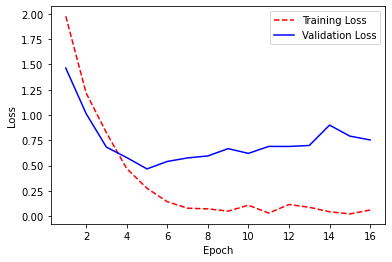

In [46]:
training_loss2= history.history['loss']
validation_loss2= history.history['val_loss']

epoch_count= range(1, len(training_loss2) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
from pydub import AudioSegment
from pydub.utils import make_chunks

long_audio = AudioSegment.from_file("long_audio1.wav" , "wav") 
slice_length = 2000  #2s slicing
slices = make_chunks(long_audio, slice_length) 

#Export all of the individual slices as wav files

for i, chunk in enumerate(slices):
    chunk_name = "slice{0}.wav".format(i)
    print ("exporting", chunk_name)
    chunk.export(chunk_name, format="wav")

In [56]:
slice_files= glob('C:/Documents/04-Project/CSE1015/*.wav')

In [57]:
def shape_make(arr):
    data= arr.reshape((arr.shape[0], arr.shape[1], arr.shape[2], 1))
    return data.astype('float32')/255

slice_files[:5]
processed_wavs, file_names= wav_to_stft(slice_files[:5], test_labels2[:5])

final= shape_make(np.array(processed_wavs))

predictions= model.predict(final)
predictions

..........

array([[1.21170045e-14, 3.65925772e-15, 7.80021970e-18, 1.25990012e-13,
        5.07847206e-17, 1.06521234e-17, 1.38468367e-19, 3.15285237e-23,
        1.44789949e-14, 1.00000000e+00],
       [5.56945324e-01, 5.58663430e-07, 4.04105748e-07, 5.88498078e-04,
        4.43683006e-02, 8.37659109e-12, 3.98080230e-01, 2.03780370e-08,
        1.11660265e-05, 5.58904594e-06],
       [3.11973447e-04, 4.26397860e-01, 4.11054879e-01, 8.36663603e-05,
        1.08562976e-01, 9.30933375e-09, 3.29911560e-02, 5.49032920e-05,
        3.53588606e-03, 1.70066785e-02],
       [3.08850552e-19, 5.77485881e-29, 0.00000000e+00, 1.00000000e+00,
        4.73299788e-28, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.65015831e-06, 7.19289660e-01, 3.72450160e-08, 2.68488646e-01,
        5.17687295e-03, 4.81803175e-09, 2.60574534e-03, 7.61447154e-06,
        1.14251213e-08, 4.42768028e-03],
       [2.50535426e-15, 5.83038132e-11, 1.61144388e-04, 8.71909320e-01,
   

#### Sample predictions

In [79]:
for i in range(len(file_names)):
    p=np.argmax(predictions[i])
    print('Model predicts {} is {}\n'.format(
        os.path.basename(file_names[i]), inverted_cdict[p])
    )

Model predicts 1002.wav is car_horn

Model predicts 1005.wav is siren

Model predicts 1009.wav is street_music

Model predicts 1010.wav is dog_bark

Model predicts 1011.wav is street_music

Model predicts 1012.wav is dog_bark

Model predicts 1013.wav is drilling

Model predicts 1016.wav is air_conditioner

Model predicts 1019.wav is engine_idling

Model predicts 102.wav is air_conditioner



In [107]:
fname= file_names[4]
print(os.path.basename(fname))
ipd.Audio(fname)

1011.wav
